# EDA On Cleaned Data Set

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import plotly.graph_objects as go

df = pd.read_csv("../data/clean.csv")

loan_status_group = df.groupby('ProjectState').LoanStatus.value_counts(normalize=True).unstack().fillna(0)
loan_status_group['default_rate'] = loan_status_group.get(0, 0) * 100

state_default_rate = loan_status_group[['default_rate']].reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=state_default_rate['ProjectState'],
    z=state_default_rate['default_rate'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title="Default Rate (%)", 
))

fig.update_layout(
    title_text='7(a) SBA Assisted Loan Default Rate Grouped by U.S. State', 
    geo_scope='usa',
)

# Show the map
fig.show()

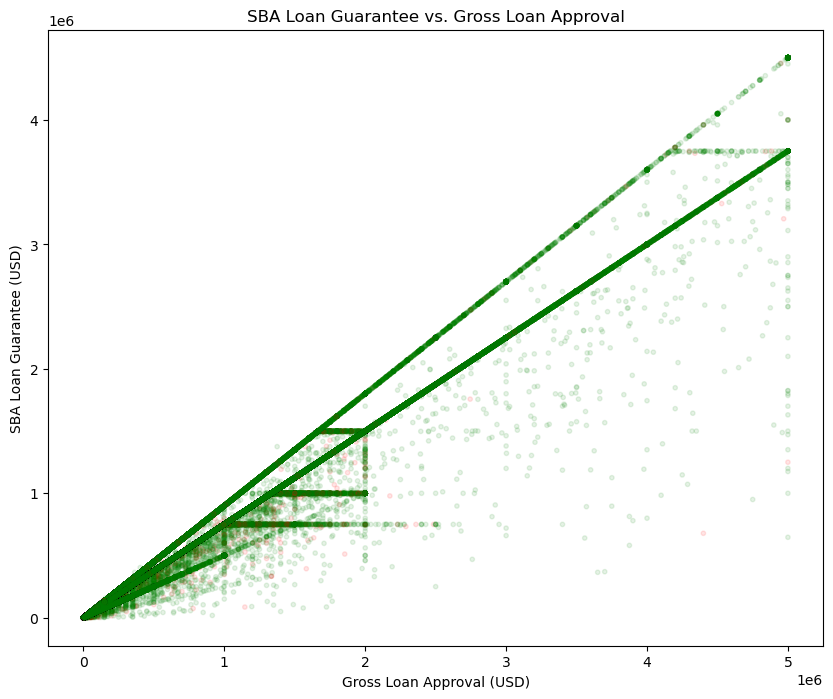

In [2]:
colors = df['LoanStatus'].map({0: 'red', 1: 'green'})

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['GrossApproval'], df['SBAGuaranteedApproval'],
            c=colors, alpha=0.1, s=10) 

# Add labels and title
plt.xlabel('Gross Loan Approval (USD)')
plt.ylabel('SBA Loan Guarantee (USD)')
plt.title('SBA Loan Guarantee vs. Gross Loan Approval')
plt.savefig('../figures/Approval_Guarantee_Scatter_Plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


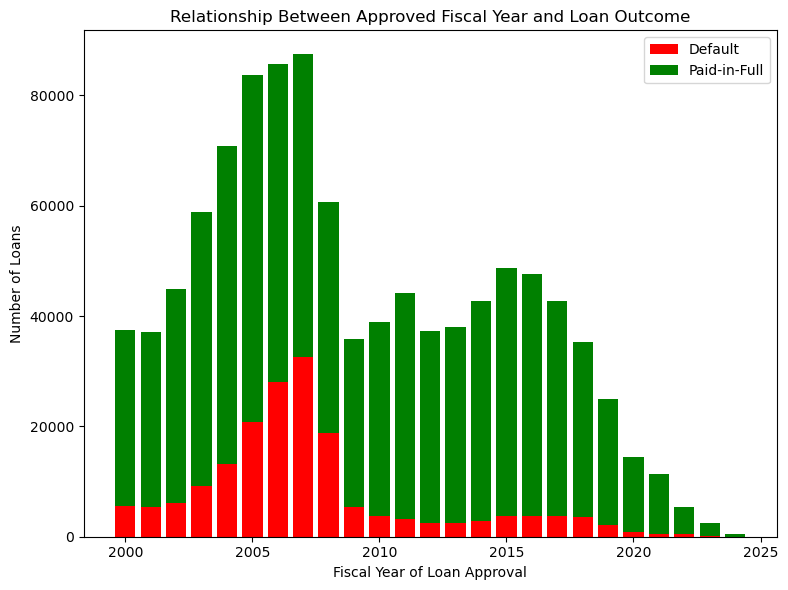

In [3]:

grouped = df.groupby(['ApprovalFiscalYear', 'LoanStatus']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(grouped.index, grouped[0], label='Default', color='red')

ax.bar(grouped.index, grouped[1], bottom=grouped[0], label='Paid-in-Full', color='green')

ax.set_xlabel('Fiscal Year of Loan Approval')
ax.set_ylabel('Number of Loans')
ax.set_title('Relationship Between Approved Fiscal Year and Loan Outcome')

ax.legend()


plt.tight_layout()
plt.savefig('../figures/Loan_Status_By_Fiscal_Year.png', dpi=300, bbox_inches='tight')
plt.show()


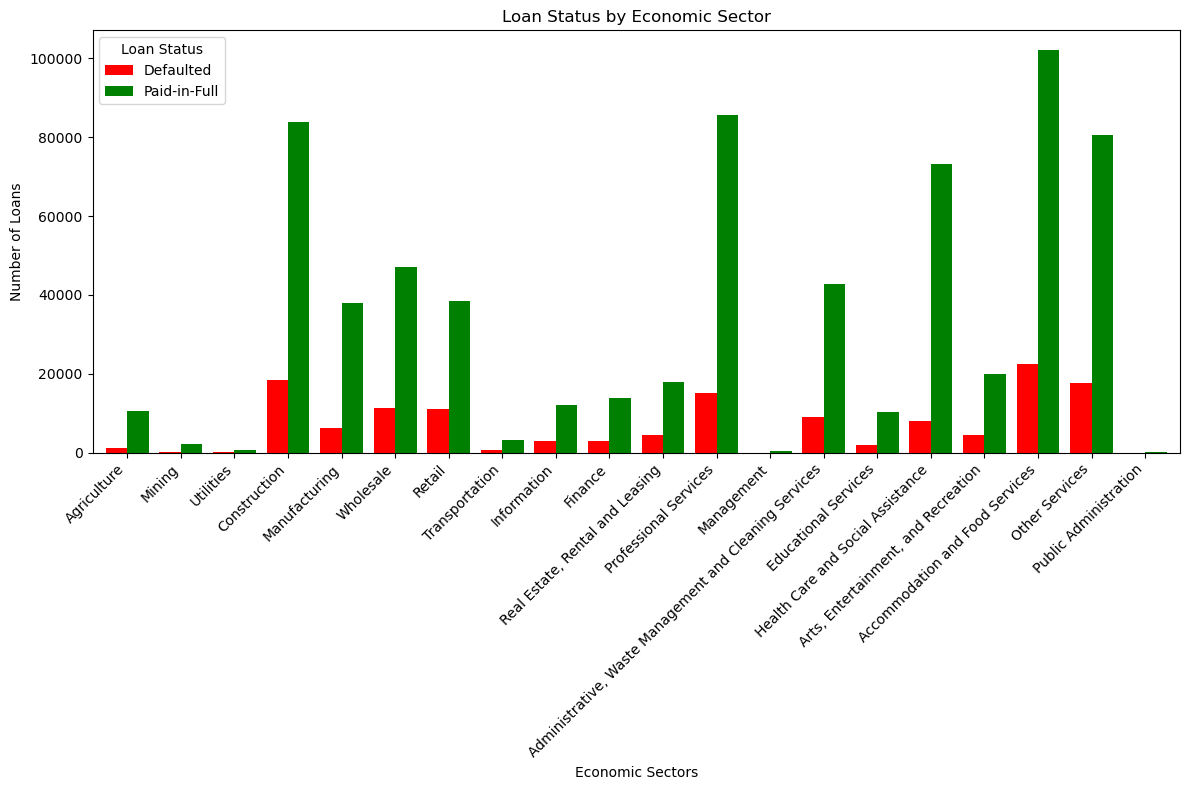

In [4]:
import matplotlib.pyplot as plt

sectors = ['Agriculture', 'Mining', 'Utilities', 'Construction', 'Manufacturing', 'Wholesale',
           'Retail', 'Transportation', 'Information', 'Finance', 'Real Estate, Rental and Leasing',
           'Professional Services', 'Management', 'Administrative, Waste Management and Cleaning Services',
           'Educational Services', 'Health Care and Social Assistance',
           'Arts, Entertainment, and Recreation', 'Accommodation and Food Services',
           'Other Services', 'Public Administration']

grouped_data = df.groupby('LoanStatus')[sectors].sum().T

ax = grouped_data.plot(kind='bar', figsize=(12, 8), width=0.8, color=['red', 'green'])

plt.title('Loan Status by Economic Sector')
plt.ylabel('Number of Loans')
plt.xlabel('Economic Sectors')
plt.xticks(rotation=45, ha='right')

# Customizing the legend title
plt.legend(title='Loan Status', labels=['Defaulted', 'Paid-in-Full'])

# Adjust layout for better fit
plt.tight_layout()

# Save the plot
plt.savefig('../figures/Loan_Status_By_Sector.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


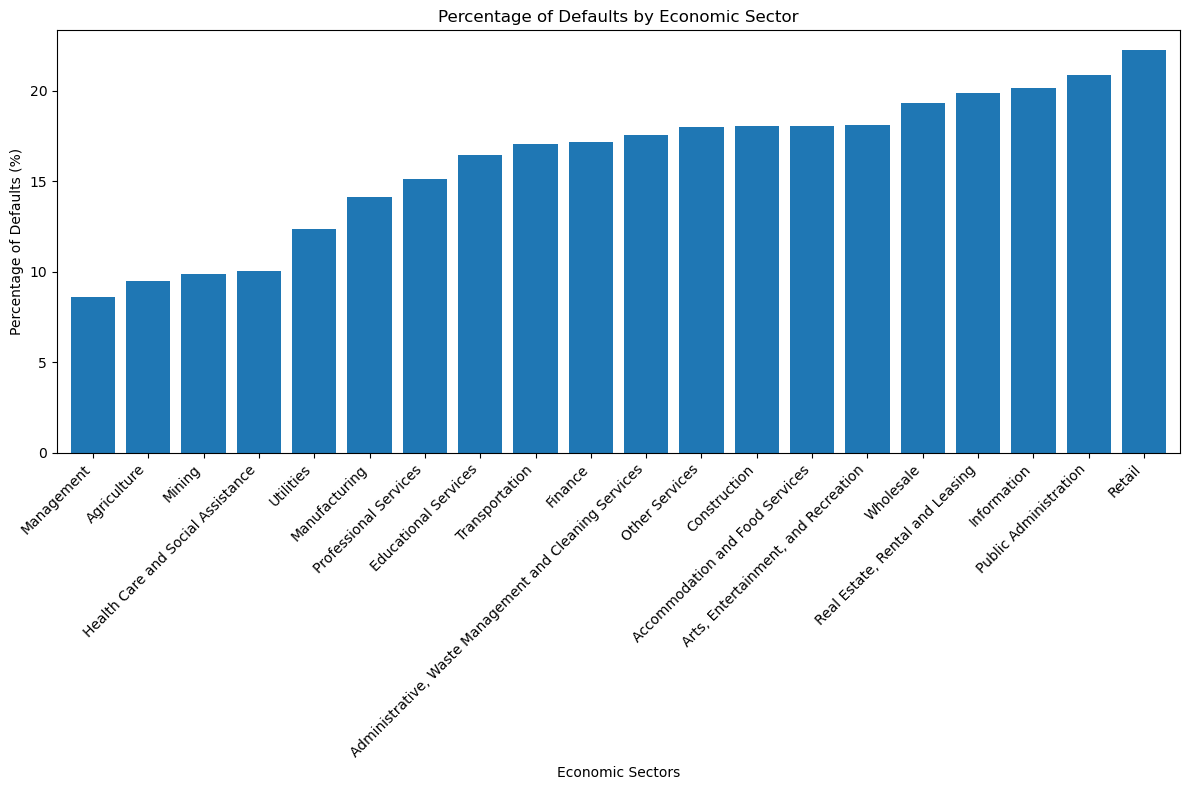

In [5]:
grouped_data = df.groupby("LoanStatus")[sectors].sum()

# Calculate total loans per sector
total_loans = grouped_data.loc[0] + grouped_data.loc[1]

# Calculate percentage of defaults (CHGOFF)
percent_defaults = (grouped_data.loc[0] / total_loans) * 100
percent_defaults = percent_defaults.sort_values()

# Plotting the percentage of defaults
percent_defaults.plot(kind="bar", figsize=(12, 8), width=0.8)
plt.title('Percentage of Defaults by Economic Sector')
plt.ylabel('Percentage of Defaults (%)')
plt.xlabel('Economic Sectors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/Loan_Default_Rate_By_Sector.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
